In [2]:
import numpy as np
import rdkit 
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import matplotlib.pyplot as plt

from tdc.multi_pred import DTI

In [3]:
data = DTI(name='BindingDB_IC50') 
data.harmonize_affinities(mode='max_affinity')
data.convert_to_log(form='binding')

Downloading...
100%|██████████| 839M/839M [00:52<00:00, 15.9MiB/s] 
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!
To log space...


In [4]:
split = data.get_split()

In [5]:
proteins = {'P35968': {'ChEMBL_ID': 'CHEMBL279',
            'Nickname': 'VEGFR-2',
            'Fullname': 'Vascular endothelial growth factor receptor 2'},
            
            'P07711': {'ChEMBL_ID': 'CHEMBL3837',
            'Nickname': 'CTSL',
            'Fullname': 'Cathepsin L'},
            
            'P08172': {'ChEMBL_ID': 'CHEMBL211',
            'Nickname': 'CHRM2',
            'Fullname': 'Muscarinic acetylcholine receptor M2'}
 }

In [6]:
df_train = split['train']
df_train['Set'] = 'train'
df_valid = split['valid']
df_valid['Set'] = 'valid'
df_test = split['test']
df_test['Set'] = 'test'

df = pd.concat([df_train, df_valid, df_test])

In [7]:
df_VEGFR2 = df[df['Target_ID'] == 'P35968'].reset_index(drop=True)
df_CTSL = df[df['Target_ID'] == 'P07711'].reset_index(drop=True)
df_CHRM2 = df[df['Target_ID'] == 'P08172'].reset_index(drop=True)

In [8]:
df_VEGFR2[df_VEGFR2['Set'] == 'train'].shape, df_VEGFR2[df_VEGFR2['Set'] == 'valid'].shape, df_VEGFR2[df_VEGFR2['Set'] == 'test'].shape

((5113, 6), (738, 6), (1483, 6))

In [9]:
df_VEGFR2_psl = pd.DataFrame()
df_CTSL_psl = pd.DataFrame()
df_CHRM2_psl = pd.DataFrame()

In [10]:
df_VEGFR2_psl['smiles'] = [Chem.CanonSmiles(x) for x in df_VEGFR2['Drug']]
df_VEGFR2_psl['y'] = df_VEGFR2['Y']

df_CTSL_psl['smiles'] = [Chem.CanonSmiles(x) for x in df_CTSL['Drug']]
df_CTSL_psl['y'] = df_CTSL['Y']

df_CHRM2_psl['smiles'] = [Chem.CanonSmiles(x) for x in df_CHRM2['Drug']]
df_CHRM2_psl['y'] = df_CHRM2['Y']

In [11]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_CTSL_psl['smiles'], df_CTSL_psl['y'], test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.index = X_train.index.set_names('Id')
y_train.index = y_train.index.set_names('Id')
X_test.index = X_test.index.set_names('Id')
y_test.index = y_test.index.set_names('Id')

X_train = X_train.reset_index()
y_train = y_train.reset_index()
X_test = X_test.reset_index()
y_test = y_test.reset_index()

X_train.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/github/ChallengePSL/data/CTSL/X_train.csv', index=False)
y_train.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/github/ChallengePSL/data/CTSL/y_train.csv', index=False)
X_test.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/github/ChallengePSL/data/CTSL/X_test.csv', index=False)
y_test.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/github/ChallengePSL/data/CTSL/y_test.csv', index=False)



In [28]:
X_train

,Id,smiles
0,0,CCN1CC[C@@H](c2ccccc2)[C@H](C(=O)OC2CCCCC2)C1
1,1,CCCCCCCCCCOC(=O)C1=C(c2ccccc2)CCN(CC)C1
2,2,C[N+]1(CC(=O)c2cccc(F)c2)CC[C@@H](N2CC(c3ccc(F...
3,3,C#CC(C)O/N=C1\CN2CCC1C2
4,4,CCN1CCN(c2ccc(NC(=O)c3cc(C(F)(F)F)ccc3C(F)(F)F...
...,...,...
299,299,CCC#CCO/N=C1\CN2CCC1C2
300,300,CCN1CCC(c2ccccc2)=C(C(=O)OCC(C)C)C1
301,301,O=C(c1ccc(CO)o1)N1CCOC2(CCN(Cc3ccc(Cl)cc3)CC2)C1
302,302,O=C(O[C@H]1C[N+]2(CCCc3cccs3)CCC1CC2)N(Cc1cccs...


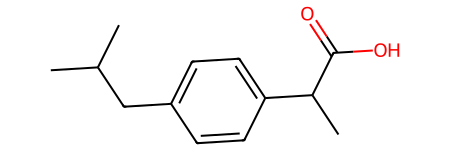

In [145]:
Chem.MolFromSmiles("CC(C)CC1=CC=C(C=C1)C(C)C(=O)O")